In [13]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
flights = pd.read_csv(r'C:\Users\progressive\Desktop\midterm_project\flights.csv')
flights

In [15]:
flights_needed_data = flights.sample(n=100000)  # getting a segment 

In [16]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3829183,2015,8,26,3,AA,1756,N838AW,CLT,BDL,955,...,1141.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1487726,2015,4,6,1,WN,4031,N651SW,LAX,MCI,930,...,1511.0,36.0,0,0,NaN,5.0,0.0,1.0,30.0,0.0
3773667,2015,8,22,6,DL,868,N314NB,MSP,BOS,1920,...,2331.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
5257206,2015,11,25,3,UA,612,N37419,LAS,ORD,1240,...,1758.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3071432,2015,7,12,7,MQ,3037,N690MQ,DFW,PNS,705,...,901.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022946,2015,11,10,2,UA,283,N66848,LAX,ORD,1350,...,1942.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3625436,2015,8,13,4,EV,5947,N13988,ICT,ORD,1808,...,2032.0,26.0,0,0,NaN,18.0,0.0,8.0,0.0,0.0
442441,2015,1,30,5,UA,516,N412UA,DFW,ORD,600,...,814.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
270044,2015,1,18,7,WN,1027,N618WN,MKE,MCI,1730,...,1855.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
flights_needed_data.info()  # for an insight into the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3829183 to 4619057
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99762 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98507 non-null   float64
 11  DEPARTURE_DELAY      98507 non-null   float64
 12  TAXI_OUT             98461 non-null   float64
 13  WHEELS_OFF           98461 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TI

In [18]:
flights_needed_data.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted

DIVERTED
0    99751
1      249
dtype: int64

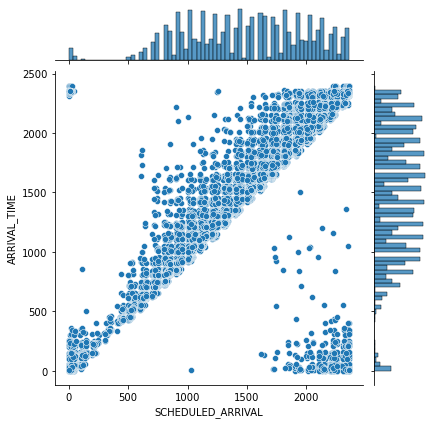

In [19]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [20]:
corr = flights_needed_data.corr(method='pearson')

<AxesSubplot:>

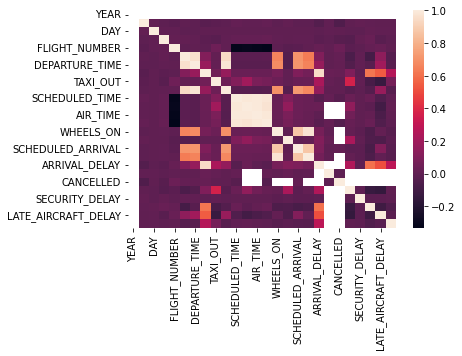

In [21]:
sb.heatmap(corr)

In [22]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.009009,-0.008438,-0.018441,-0.002561,-0.006381,-0.024327,-0.012568,-0.006965,...,-0.008883,-0.008392,-0.037718,0.001789,-0.052077,0.000742,0.007914,0.004667,-0.002601,0.000005
DAY,NaN,0.009009,1.000000,0.003236,0.003327,-0.004322,-0.003962,-0.001202,-0.002225,-0.003335,...,-0.003175,-0.003177,-0.004385,0.006369,0.000093,-0.005014,-0.005043,0.010664,0.002797,0.004759
DAY_OF_WEEK,NaN,-0.008438,0.003236,1.000000,0.008057,0.009316,0.005897,-0.010157,-0.019727,0.004848,...,0.006121,0.006451,-0.015056,-0.004402,-0.024743,-0.032185,0.011438,0.022946,-0.020737,-0.008479
FLIGHT_NUMBER,NaN,-0.018441,0.003327,0.008057,1.000000,-0.004520,0.000095,-0.007591,0.047894,0.005720,...,-0.015182,-0.003352,0.017986,0.005726,0.035488,-0.016945,-0.004058,0.014879,0.023355,-0.003377
SCHEDULED_DEPARTURE,NaN,-0.002561,-0.004322,0.009316,-0.004520,1.000000,0.962592,0.110377,0.007892,0.938588,...,0.705510,0.632070,0.101069,-0.002312,0.014345,-0.062539,0.003233,-0.091398,0.142470,-0.032339
DEPARTURE_TIME,NaN,-0.006381,-0.003962,0.005897,0.000095,0.962592,1.000000,0.174920,0.014684,0.974322,...,0.712520,0.652817,0.163084,-0.002467,0.007476,-0.042188,0.005027,-0.026219,0.200600,-0.027814
DEPARTURE_DELAY,NaN,-0.024327,-0.001202,-0.010157,-0.007591,0.110377,0.174920,1.000000,0.056498,0.165139,...,0.099398,0.060505,0.943166,0.022609,0.020118,0.096698,-0.005795,0.618814,0.543209,0.260362
TAXI_OUT,NaN,-0.012568,-0.002225,-0.019727,0.047894,0.007892,0.014684,0.056498,1.000000,0.040885,...,0.027008,0.030987,0.228162,0.012988,-0.001485,0.366128,0.003276,-0.081035,-0.133147,0.066277
WHEELS_OFF,NaN,-0.006965,-0.003335,0.004848,0.005720,0.938588,0.974322,0.165139,0.040885,1.000000,...,0.722748,0.671188,0.159360,-0.002636,0.001156,-0.025426,-0.006393,-0.036185,0.169993,-0.027259


In [23]:
# filtering out unnecessary columns
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [24]:
flights_needed_data.reset_index(inplace=True)

In [25]:
# replacing all NaN values with the mean of the attribute in which they are present
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

C:\Users\progressive\AppData\Local\Temp\ipykernel_14988\1638544876.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())


In [26]:
flights_needed_data = flights_needed_data.drop(columns=['index'])
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,8,26,CLT,BDL,955,-3.0,1158,1141.0,-17.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
1,4,6,LAX,MCI,930,31.0,1435,1511.0,36.0,0,0,5.000000,0.000000,1.000000,30.00000,0.000000
2,8,22,MSP,BOS,1920,1.0,2306,2331.0,25.0,0,0,25.000000,0.000000,0.000000,0.00000,0.000000
3,11,25,LAS,ORD,1240,-2.0,1820,1758.0,-22.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
4,7,12,DFW,PNS,705,0.0,853,901.0,8.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11,10,LAX,ORD,1350,-2.0,1954,1942.0,-12.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
99996,8,13,ICT,ORD,1808,8.0,2006,2032.0,26.0,0,0,18.000000,0.000000,8.000000,0.00000,0.000000
99997,1,30,DFW,ORD,600,-2.0,823,814.0,-9.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
99998,1,18,MKE,MCI,1730,5.0,1905,1855.0,-10.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144


In [27]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [28]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [29]:
flights_needed_data['result'] = result

In [30]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,26,CLT,BDL,955,-3.0,1158,1141.0,-17.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
1,4,6,LAX,MCI,930,31.0,1435,1511.0,36.0,0,0,5.000000,0.000000,1.000000,30.00000,0.000000,1
2,8,22,MSP,BOS,1920,1.0,2306,2331.0,25.0,0,0,25.000000,0.000000,0.000000,0.00000,0.000000,1
3,11,25,LAS,ORD,1240,-2.0,1820,1758.0,-22.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
4,7,12,DFW,PNS,705,0.0,853,901.0,8.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11,10,LAX,ORD,1350,-2.0,1954,1942.0,-12.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
99996,8,13,ICT,ORD,1808,8.0,2006,2032.0,26.0,0,0,18.000000,0.000000,8.000000,0.00000,0.000000,1
99997,1,30,DFW,ORD,600,-2.0,823,814.0,-9.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
99998,1,18,MKE,MCI,1730,5.0,1905,1855.0,-10.0,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0


In [31]:
flights_needed_data.value_counts('result')

result
0    82338
1    17662
dtype: int64

In [32]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,26,955,-3.0,1158,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
1,4,6,930,31.0,1435,0,0,5.000000,0.000000,1.000000,30.00000,0.000000,1
2,8,22,1920,1.0,2306,0,0,25.000000,0.000000,0.000000,0.00000,0.000000,1
3,11,25,1240,-2.0,1820,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
4,7,12,705,0.0,853,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11,10,1350,-2.0,1954,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
99996,8,13,1808,8.0,2006,0,0,18.000000,0.000000,8.000000,0.00000,0.000000,1
99997,1,30,600,-2.0,823,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
99998,1,18,1730,5.0,1905,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0


In [33]:
data = flights_needed_data
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)  # splitting in the ratio 70:30

In [34]:
flights_needed_data.to_csv(r'C:\Users\progressive\Desktop\midterm_project\flights.csv',index=False, header=True)

In [35]:
X_train

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
30304,5,2,1340,2.0,1849,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
7540,5,6,1935,-3.0,2208,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
78641,3,9,1040,2.0,1145,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
71530,2,27,940,-1.0,1119,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
80090,8,14,1230,15.0,1816,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
...,...,...,...,...,...,...,...,...,...,...,...,...
64374,12,13,1355,-1.0,1515,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
16115,11,17,1350,-10.0,1541,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
20989,2,25,1031,15.0,1322,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
65562,1,9,553,-4.0,650,0,0,13.515993,0.061354,19.119869,23.16452,3.048144


In [49]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [50]:
pred = classifier.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
X_test.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
7473,2,4,1714,124.0,1910,0,0,0.000000,0.000000,0.000000,120.00000,0.000000
35633,8,14,1659,-5.0,1821,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
47864,1,31,1105,0.0,1247,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
84856,9,11,910,-4.0,1243,0,0,13.515993,0.061354,19.119869,23.16452,3.048144
17241,8,14,1510,13.0,2110,0,0,13.515993,0.061354,19.119869,23.16452,3.048144


In [52]:
# X_test.AIR_SYSTEM_DELAY.min()
X_test.SCHEDULED_DEPARTURE.min()

5

In [53]:
X_test.columns
# X_test.info()

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [54]:
trsh = pd.DataFrame(columns=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'])

In [55]:
trsh

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [57]:
pred_prob = classifier.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9967441932174214

In [58]:
x = pd.read_csv(r'C:\Users\progressive\Desktop\midterm_project\flights.csv').iloc[:,1:]
x.head()
pd.io.sql.get_schema(x.reset_index(), 'data')

'CREATE TABLE "data" (\n"index" INTEGER,\n  "DAY" INTEGER,\n  "SCHEDULED_DEPARTURE" INTEGER,\n  "DEPARTURE_DELAY" REAL,\n  "SCHEDULED_ARRIVAL" INTEGER,\n  "DIVERTED" INTEGER,\n  "CANCELLED" INTEGER,\n  "AIR_SYSTEM_DELAY" REAL,\n  "SECURITY_DELAY" REAL,\n  "AIRLINE_DELAY" REAL,\n  "LATE_AIRCRAFT_DELAY" REAL,\n  "WEATHER_DELAY" REAL,\n  "result" INTEGER\n)'

In [59]:
flights_needed_data.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,26,955,-3.0,1158,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
1,4,6,930,31.0,1435,0,0,5.000000,0.000000,1.000000,30.00000,0.000000,1
2,8,22,1920,1.0,2306,0,0,25.000000,0.000000,0.000000,0.00000,0.000000,1
3,11,25,1240,-2.0,1820,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0
4,7,12,705,0.0,853,0,0,13.515993,0.061354,19.119869,23.16452,3.048144,0


In [60]:
import pickle

In [63]:
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [64]:
#loading the saved model
loaded_model = pickle.load(open('finalized_model.sav','rb'))